In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
#Load dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\HRDataset_v14.csv")
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [3]:
#Check the shape of the dataset (rows, columns)
rows, columns = df.shape
print("Rows:", rows, "Columns:", columns)

Rows: 311 Columns: 36


In [4]:
#Display column name and their data types
df.dtypes.head()

Employee_Name      object
EmpID               int64
MarriedID           int64
MaritalStatusID     int64
GenderID            int64
dtype: object

In [5]:
#Find the number of unique values in each column.
uniq_vals = df.nunique()
uniq_vals.head()

Employee_Name      311
EmpID              311
MarriedID            2
MaritalStatusID      5
GenderID             2
dtype: int64

In [6]:
#Identify missing values in the dataset and list columns with nulls
missing_vals = df.isnull().sum() 
null_cols = missing_vals[missing_vals>0]
print("Columns with Nulls:\n",  null_cols)

Columns with Nulls:
 DateofTermination    207
ManagerID              8
dtype: int64


In [7]:
#Describe the numerical columns (mean, median, std)
stats = df.describe()
chosen_stats = stats.loc[['mean', '50%', 'std']]
chosen_stats = chosen_stats.rename(index={'50%':'median'}) #rename 50% to median
chosen_stats

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
median,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596


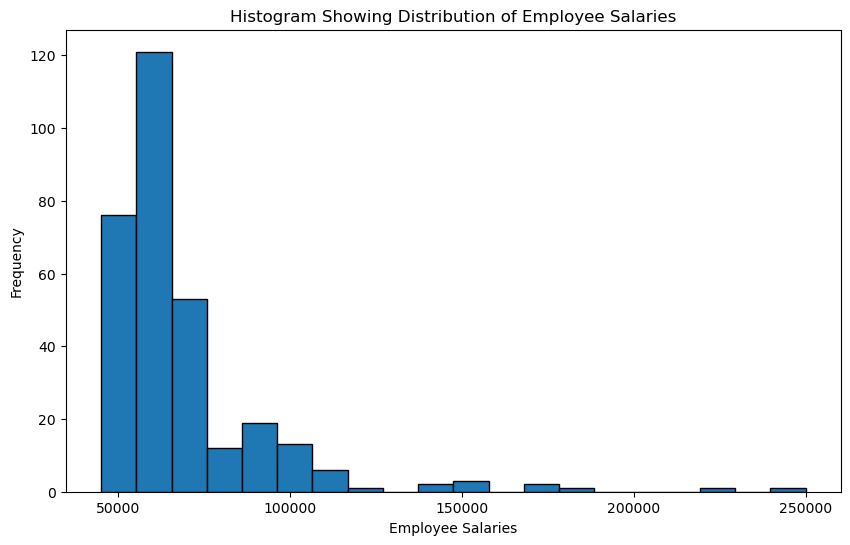

In [8]:
#Find the distribution of employee salaries
plt.figure(figsize=(10,6))
plt.hist(df['Salary'], bins=20 ,edgecolor='black')
plt.title("Histogram Showing Distribution of Employee Salaries")
plt.xlabel("Employee Salaries")
plt.ylabel("Frequency")
plt.show()

In [9]:
#What is the average age of employees at the company? (Use DOB column)
df['DOB'] = pd.to_datetime(df['DOB']) #convert to DateTime
#calculate age
df['Age'] = (pd.to_datetime('today') - df['DOB']).dt.days //365
#calculate average age
avg_age = df['Age'].mean()
avg_age

C:\Users\HP\AppData\Local\Temp\ipykernel_8\2272862117.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DOB'] = pd.to_datetime(df['DOB']) #convert to DateTime


16.84565916398714

In [10]:
#How many employees are still employed vs terminated?
comp = df['EmploymentStatus'].value_counts()
comp

EmploymentStatus
Active                    207
Voluntarily Terminated     88
Terminated for Cause       16
Name: count, dtype: int64

In [11]:
#Which departments have the most employees?
most_empl = df['Department'].value_counts()
print(most_empl)


Department
Production              209
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Executive Office          1
Name: count, dtype: int64


### Part B: Business Analysis

In [12]:
#What is the average salary per department?
avg_salary = df.groupby(['Department'])['Salary'].mean()
avg_salary

Department
Admin Offices            71791.888889
Executive Office        250000.000000
IT/IS                    97064.640000
Production               59953.545455
Sales                    69061.258065
Software Engineering     94989.454545
Name: Salary, dtype: float64

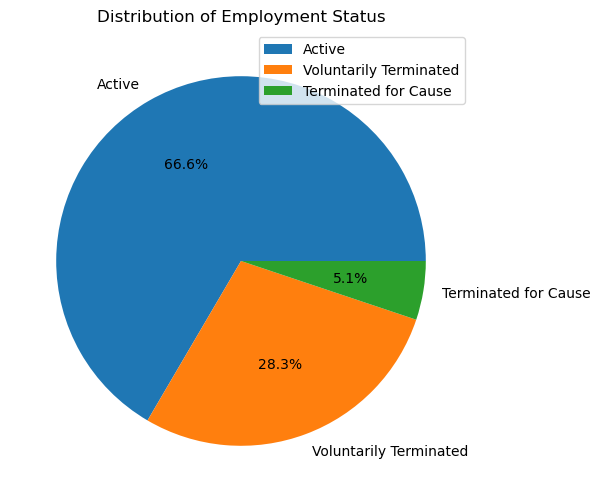

In [13]:
#Find the distribution of employment status (Active, Voluntarily Terminated, etc.).
emp_stat_count = df['EmploymentStatus'].value_counts()

plt.figure(figsize=(16,6))
plt.pie(emp_stat_count, labels=emp_stat_count.index, autopct='%1.1f%%')
plt.title("Distribution of Employment Status")
plt.legend()
plt.show()

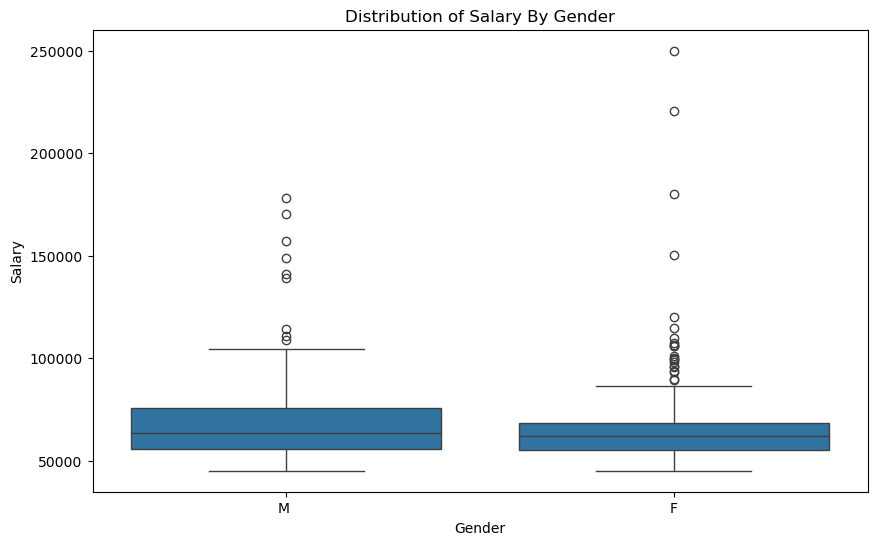

In [14]:
#Compare salary levels between Male and Female employees.
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Sex', y='Salary')
plt.title("Distribution of Salary By Gender")
plt.xlabel("Gender")
plt.ylabel("Salary")
plt.show()

In [15]:
#Which recruitment source brings in the most employees?
most_employees = df['RecruitmentSource'].value_counts()
most_employees

RecruitmentSource
Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: count, dtype: int64

In [16]:
#What percentage of employees attended a Diversity Job Fair?
div_count = df['FromDiversityJobFairID'].value_counts()
div_percentage = df['FromDiversityJobFairID'].value_counts(normalize=True) *100
print(f"{div_percentage[1]:.1f}% of employees attended a Diversity Job Fair")

9.3% of employees attended a Diversity Job Fair


In [17]:
#Compare engagement survey scores across different departments.
eng_score = df.groupby('Department')['EngagementSurvey'].mean()
eng_score

Department
Admin Offices           4.393333
Executive Office        4.830000
IT/IS                   4.154000
Production              4.129569
Sales                   3.818710
Software Engineering    4.061818
Name: EngagementSurvey, dtype: float64

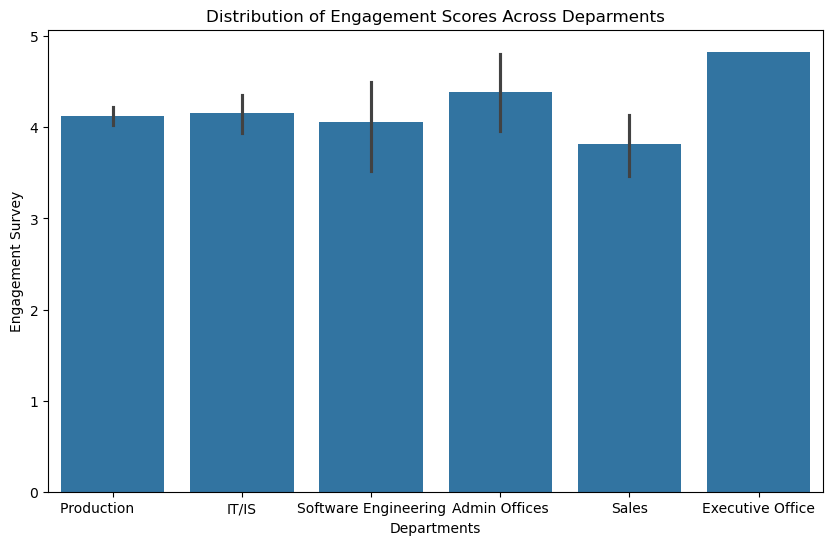

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Department', y='EngagementSurvey')
plt.title("Distribution of Engagement Scores Across Deparments")
plt.xlabel("Departments")
plt.ylabel("Engagement Survey")
plt.show()

In [19]:
#Which race has the highest average salary?
highest_avg_salary = df.groupby('RaceDesc')['Salary'].mean().sort_values(ascending=False)
highest_avg_salary

RaceDesc
Hispanic                            83667.000000
Black or African American           74431.025000
Asian                               68521.206897
White                               67287.545455
American Indian or Alaska Native    65806.000000
Two or more races                   59998.181818
Name: Salary, dtype: float64

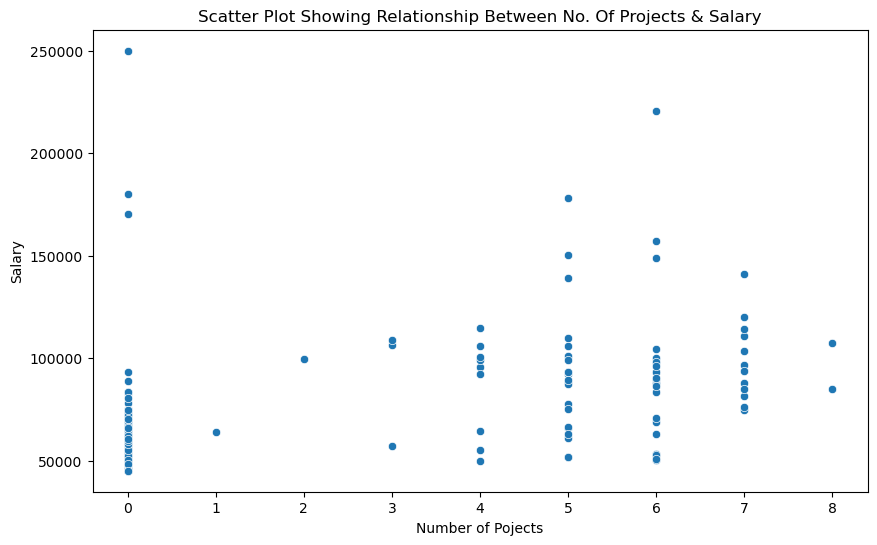

In [20]:
#What is the relationship between number of projects (SpecialProjectsCount) and salary?
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, y='Salary', x='SpecialProjectsCount')
plt.title("Scatter Plot Showing Relationship Between No. Of Projects & Salary")
plt.xlabel("Number of Pojects")
plt.ylabel("Salary")
plt.show()

In [21]:
#Do married employees earn more on average than single employees?
avg_salary_by_marriage = df.groupby('MarriedID')['Salary'].mean()
avg_salary_by_marriage  # 0 rep single, 1 rep married

MarriedID
0    68485.540107
1    69827.717742
Name: Salary, dtype: float64

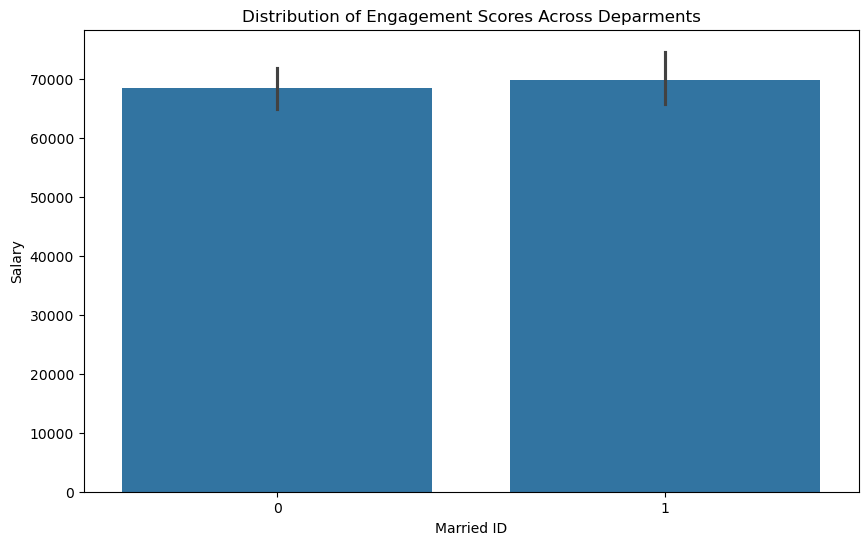

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='MarriedID', y='Salary')
plt.title("Distribution of Engagement Scores Across Deparments")
plt.xlabel("Married ID")
plt.ylabel("Salary")
plt.show()

In [23]:
#Which managers have the largest teams?
largest_team = df['ManagerName'].value_counts().sort_values(ascending=False)
largest_team

ManagerName
Michael Albert        22
Kissy Sullivan        22
Elijiah Gray          22
Kelley Spirea         22
Brannon Miller        22
Ketsia Liebig         21
David Stanley         21
Amy Dunn              21
Webster Butler        21
Janet King            19
Simon Roup            17
Peter Monroe          14
John Smith            14
Lynn Daneault         13
Alex Sweetwater        9
Brian Champaigne       8
Brandon R. LeBlanc     7
Jennifer Zamora        7
Eric Dougall           4
Debra Houlihan         3
Board of Directors     2
Name: count, dtype: int64

### Part C: Data Visualization

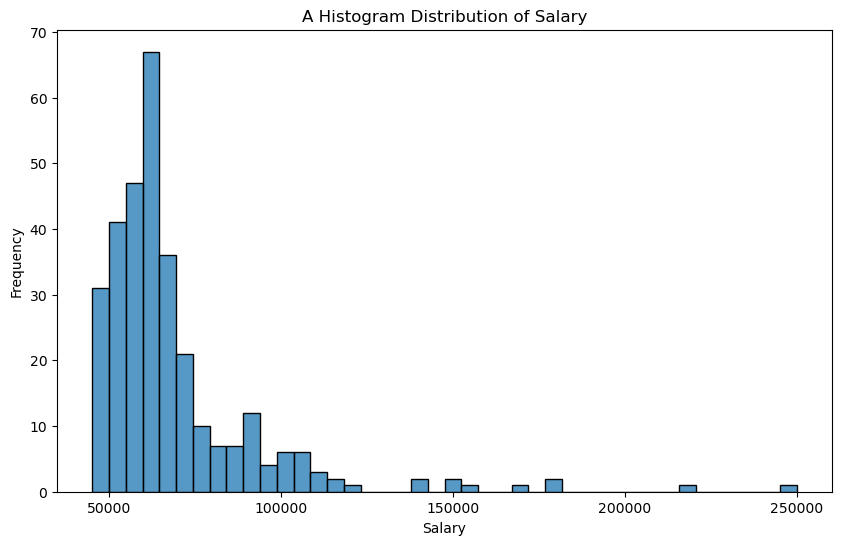

In [24]:
#Plot the salary distribution using histograms.
plt.figure(figsize=(10,6))
sns.histplot(df['Salary'])
plt.title("A Histogram Distribution of Salary")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

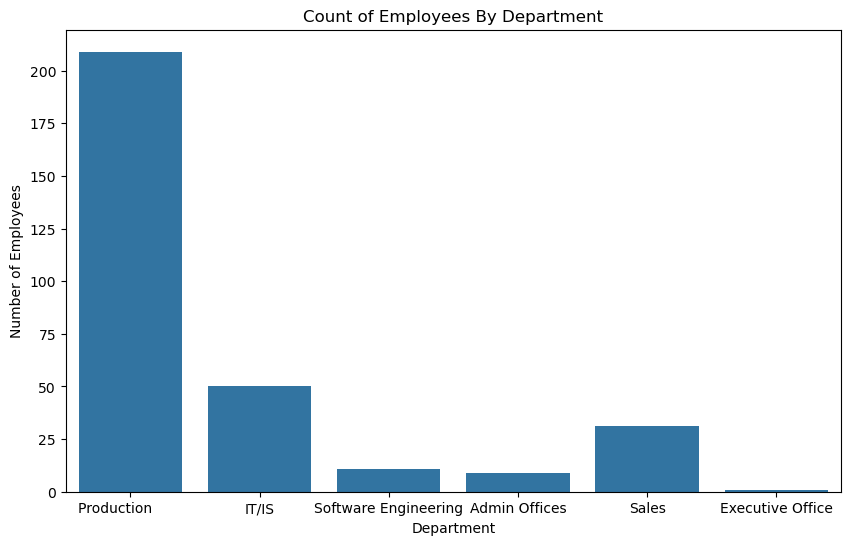

In [25]:
#Show the count of employees by department.
employee_count = df['Department'].value_counts() #no. of employees in each department

plt.figure(figsize=(10,6))
sns.countplot(data=df, x=df['Department'])
plt.title("Count of Employees By Department")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.show()


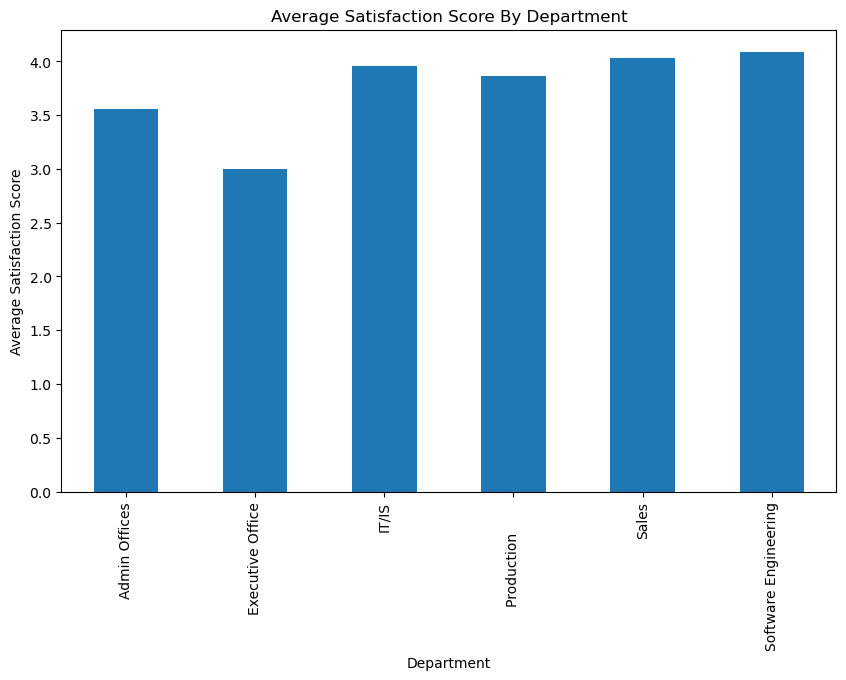

In [26]:
#Compare average satisfaction score by department.
#get avg satisfaction score
avg_sat_score = df.groupby('Department')['EmpSatisfaction'].mean()
#plot
plt.figure(figsize=(10,6))
avg_sat_score.plot(kind="bar")
plt.title("Average Satisfaction Score By Department")
plt.ylabel("Average Satisfaction Score")
plt.xlabel("Department")
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_8\249227110.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terminated_employees['TerminationYear'] = terminated_employees['DateofTermination'].dt.year.astype(int)


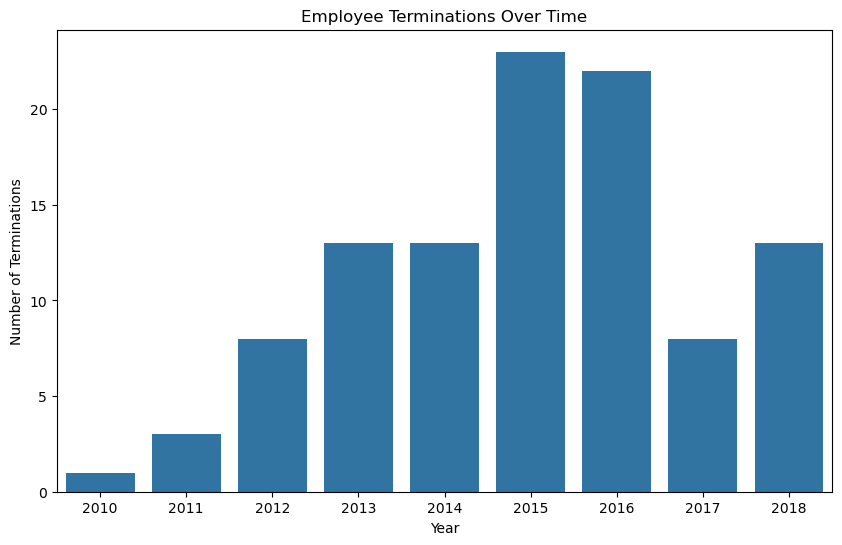

In [27]:
#Visualize employee terminations over time.
#convert to datetime
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'])
#filter terminated employees (where not null)
terminated_employees = df.dropna(subset=['DateofTermination'])
# extract year from DateofTermination
terminated_employees['TerminationYear'] = terminated_employees['DateofTermination'].dt.year.astype(int)
# count no. of termination per year
terminations_by_year = terminated_employees['TerminationYear'].value_counts().sort_index()
#plot 
plt.figure(figsize=(10,6))
sns.barplot(data=terminations_by_year)
plt.title("Employee Terminations Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Terminations")
plt.show()

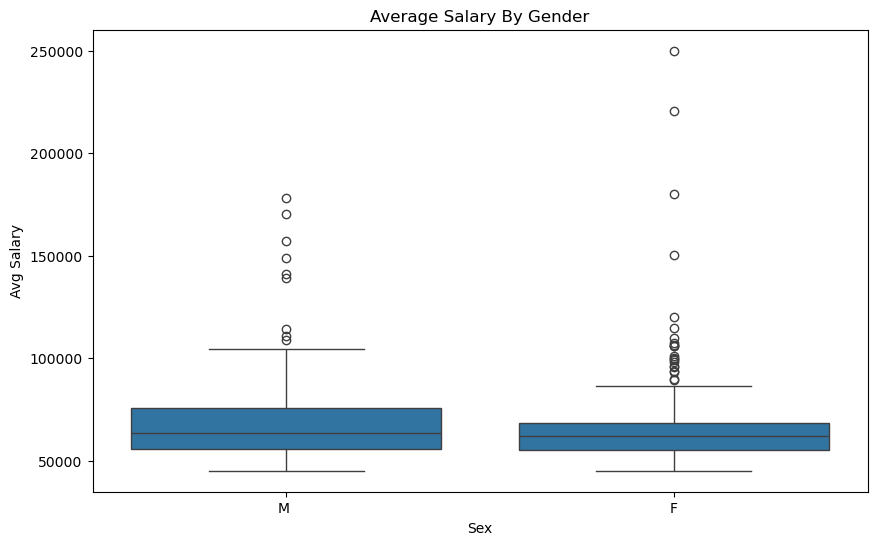

In [28]:
#Plot average salary by gender using a boxplot.
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Sex', y='Salary')
plt.title("Average Salary By Gender")
plt.xlabel("Sex")
plt.ylabel("Avg Salary")
plt.show()

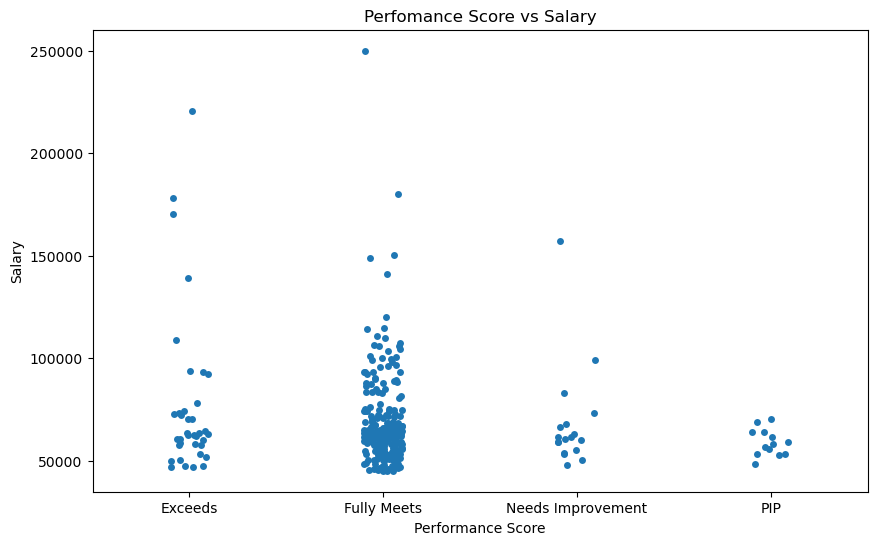

In [29]:
#Visualize performance scores vs salary.
plt.figure(figsize=(10,6))
sns.stripplot(data=df, x='PerformanceScore', y='Salary')
plt.title("Perfomance Score vs Salary")
plt.xlabel("Performance Score")
plt.ylabel("Salary")
plt.show()

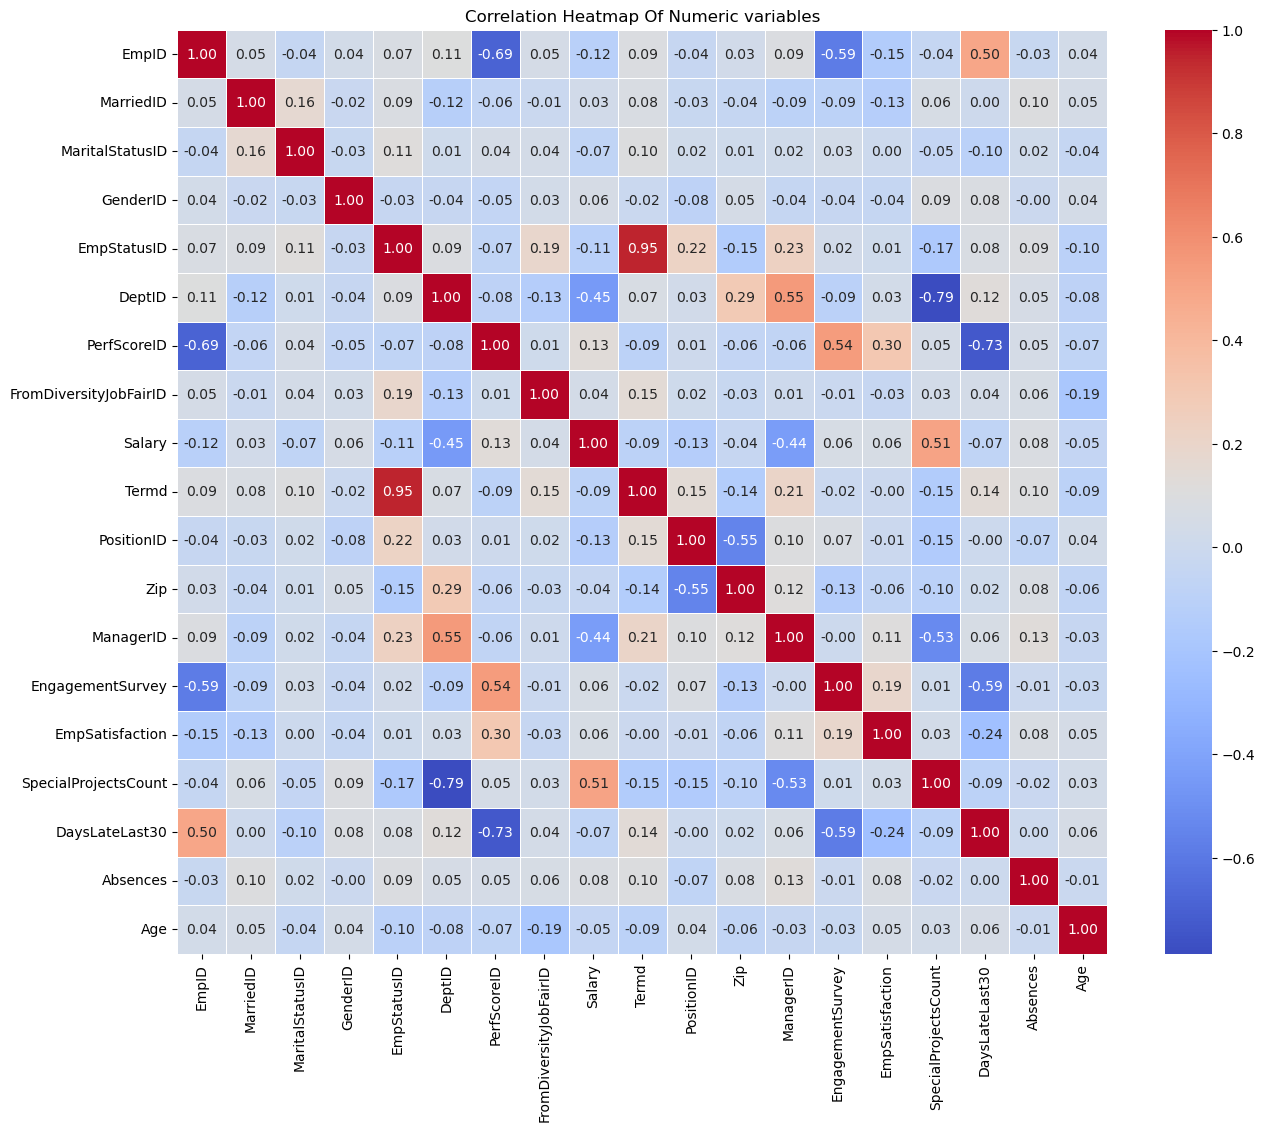

In [30]:
#Create a heatmap of correlations between numeric variables.
correlation = df.corr(numeric_only=True)
plt.figure(figsize=(15,12))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap Of Numeric variables")
plt.show()

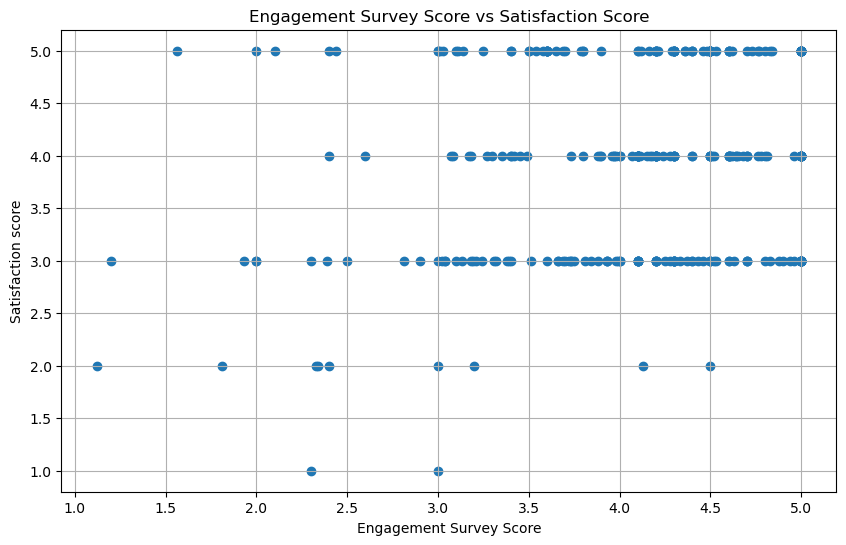

In [31]:
#Plot engagement survey score vs satisfaction score.
plt.figure(figsize=(10,6))
plt.scatter(x='EngagementSurvey', y='EmpSatisfaction', data=df)
plt.title("Engagement Survey Score vs Satisfaction Score")
plt.ylabel("Satisfaction score")
plt.xlabel("Engagement Survey Score")
plt.grid(True)
plt.show()

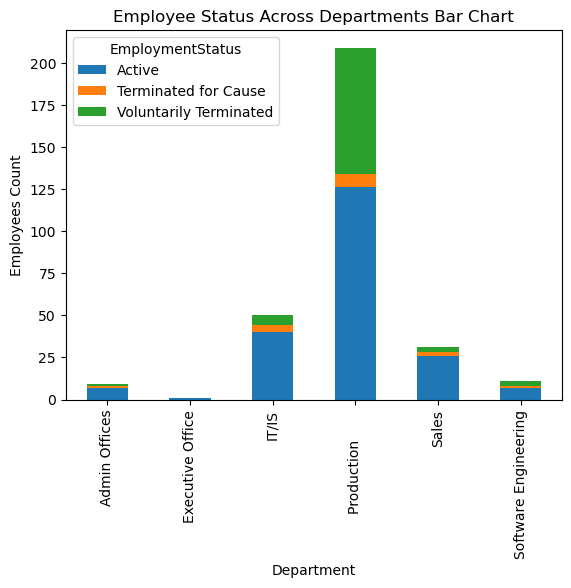

In [32]:
#Show a stacked bar chart of employee status across departments.
status_dept = pd.crosstab(df['Department'], df['EmploymentStatus']) #cross tabulation

#create plot
plt.Figure(figsize=(10,6))
status_dept.plot(kind='bar', stacked=True)
plt.title("Employee Status Across Departments Bar Chart")
plt.xlabel("Department")
plt.ylabel("Employees Count")
plt.show()

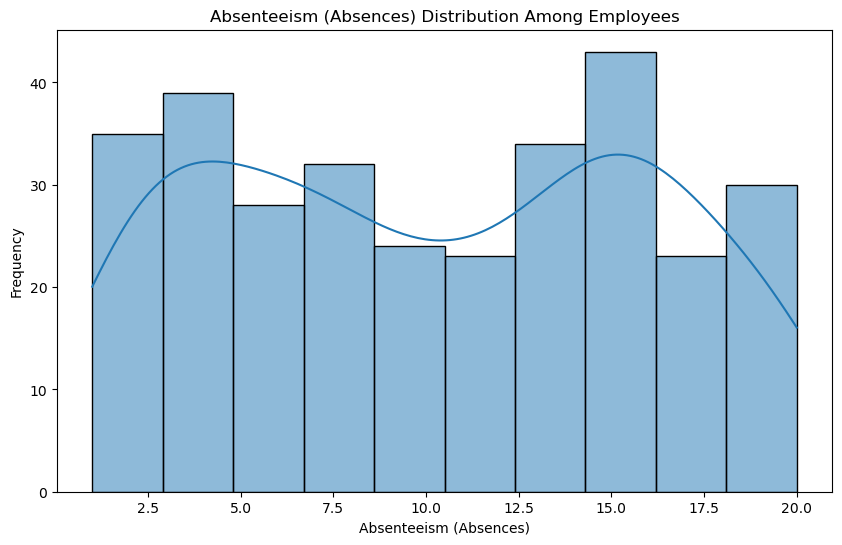

In [45]:
#Plot absenteeism (Absences) distribution among employees.
plt.figure(figsize=(10,6))
sns.histplot(df['Absences'], kde=True)
plt.title("Absenteeism (Absences) Distribution Among Employees")
plt.xlabel('Absenteeism (Absences)')
plt.ylabel('Frequency')
plt.show()

### Part D: PCA (Dimensionality Reduction)

In [34]:
#Standardize numerical features before applying PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#check numerical cols
numeric_cols = df.select_dtypes(include='number').columns
#standardize numerical cols
x = df[numeric_cols]
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x_scaled.head()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age
0,-1.448024,-0.814311,-0.860434,1.141798,-0.777162,0.359667,1.744516,-0.320682,-0.259382,-0.708813,0.346725,-0.272225,0.921150,0.621302,1.222022,-0.519538,-0.320937,-1.580979,0.651994
1,-0.801983,1.228033,0.201451,1.141798,1.455609,-1.489199,0.038401,-0.320682,1.410101,1.410810,1.634263,-0.261088,-1.310726,1.077769,-0.981160,2.038398,-0.320937,1.157257,0.859352
2,0.445546,1.228033,0.201451,-0.875811,1.455609,0.359667,0.038401,-0.320682,-0.161875,1.410810,0.507667,-0.281111,0.673164,-1.382080,-0.981160,-0.519538,-0.320937,-1.238699,0.496476
3,-0.757428,1.228033,0.201451,-0.875811,-0.777162,0.359667,0.038401,-0.320682,-0.160442,-0.708813,0.346725,-0.276609,0.177191,0.925613,1.222022,-0.519538,-0.320937,0.814977,0.496476
4,-0.969062,-0.814311,1.263336,-0.875811,1.455609,0.359667,0.038401,-0.320682,-0.724461,1.410810,0.346725,-0.259844,3.029033,1.128487,0.120431,-0.519538,-0.320937,-1.409839,0.496476


In [35]:
#check columns with missing values
x_scaled.isna().sum()[df.isna().sum() >0]

ManagerID    8
dtype: int64

In [36]:
#drop column 
x_scaled.drop("ManagerID", axis=1, inplace=True)
x_scaled.head()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age
0,-1.448024,-0.814311,-0.860434,1.141798,-0.777162,0.359667,1.744516,-0.320682,-0.259382,-0.708813,0.346725,-0.272225,0.621302,1.222022,-0.519538,-0.320937,-1.580979,0.651994
1,-0.801983,1.228033,0.201451,1.141798,1.455609,-1.489199,0.038401,-0.320682,1.410101,1.410810,1.634263,-0.261088,1.077769,-0.981160,2.038398,-0.320937,1.157257,0.859352
2,0.445546,1.228033,0.201451,-0.875811,1.455609,0.359667,0.038401,-0.320682,-0.161875,1.410810,0.507667,-0.281111,-1.382080,-0.981160,-0.519538,-0.320937,-1.238699,0.496476
3,-0.757428,1.228033,0.201451,-0.875811,-0.777162,0.359667,0.038401,-0.320682,-0.160442,-0.708813,0.346725,-0.276609,0.925613,1.222022,-0.519538,-0.320937,0.814977,0.496476
4,-0.969062,-0.814311,1.263336,-0.875811,1.455609,0.359667,0.038401,-0.320682,-0.724461,1.410810,0.346725,-0.259844,1.128487,0.120431,-0.519538,-0.320937,-1.409839,0.496476


In [37]:
#Perform PCA on the dataset and explain the first 2 components.
#PCA
pca = PCA(n_components=2) #initialise components
pca_results =pca.fit_transform(x_scaled) #fit PCA to scaled data
#DF for principal components
pca_df = pd.DataFrame(data=pca_results, columns=['PC1', 'PC2'])
pca_df.head()

,PC1,PC2
0,2.095023,0.280218
1,1.206899,0.253615
2,-1.465309,1.353124
3,1.126097,0.407134
4,0.379014,2.510711


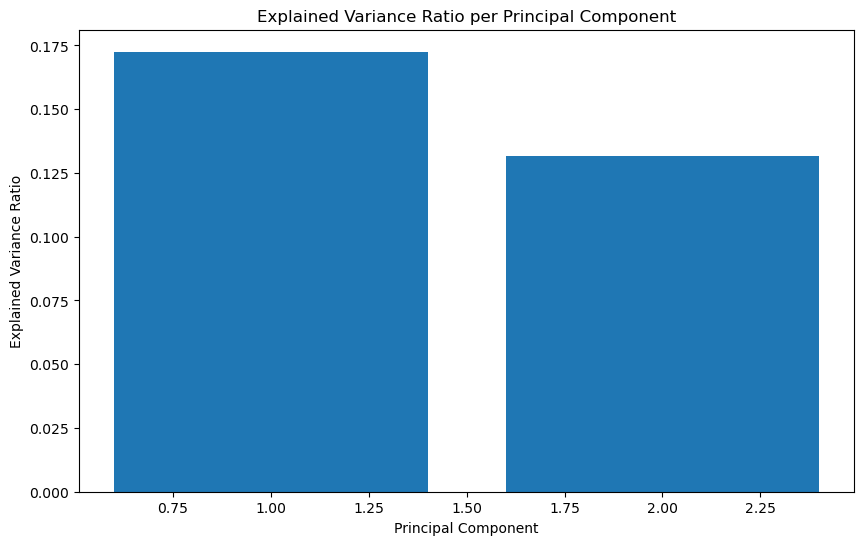

In [38]:
#Plot the explained variance ratio for the PCA components
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.title('Explained Variance Ratio per Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

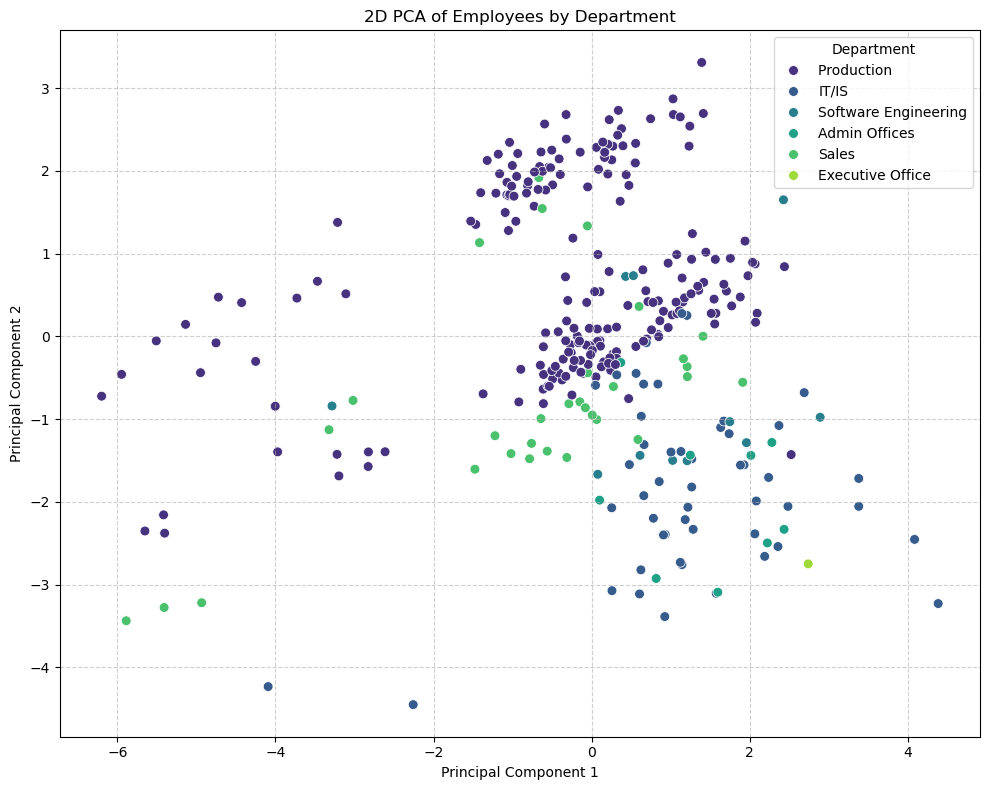

In [39]:
#Reduce the dataset to 2 dimensions with PCA and plot employees colored by department.
#Get Department col by merging PCA df with originial one
final_df = pd.concat([pca_df, df['Department']], axis=1)
#create plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Department', data=final_df, s=50, palette='viridis')
plt.title('2D PCA of Employees by Department')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

In [40]:
#Which variables contribute most to the first principal component?
#get loadings for PC 1
pc1_loadings = pca.components_[0]
#Create a pandas Series to easily sort and inspect the loadings
pc1_contributions = pd.Series(pc1_loadings, index=x_scaled.columns).sort_values(ascending=False)

# Print the contributions
print(pc1_contributions)


PerfScoreID               0.474092
EngagementSurvey          0.409046
SpecialProjectsCount      0.196056
EmpSatisfaction           0.195879
Salary                    0.194904
MaritalStatusID           0.014071
Absences                  0.002011
Age                      -0.013018
PositionID               -0.014434
FromDiversityJobFairID   -0.024775
GenderID                 -0.028623
MarriedID                -0.042078
Zip                      -0.069226
EmpStatusID              -0.150770
Termd                    -0.167111
DeptID                   -0.213968
EmpID                    -0.431123
DaysLateLast30           -0.449712
dtype: float64


In [41]:
#Apply PCA to engagement + satisfaction + absences. Do these condense into 1 dimension?
#select need columns
selected_cols = ['EngagementSurvey', 'EmpSatisfaction', 'Absences']
X = df[selected_cols]

#standardize selected columns
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

#PCA
pca = PCA(n_components=1)
princ_components = pca.fit_transform(X_scaled) #fit PCA to standardized data
#print Explained variance ratio
print(f"Explained Variance Ratio for the Principal Component:", pca.explained_variance_ratio_)

# Indicates the sinngle component can explain around 39.95% of the total variance in the 3 variables
#suggests single dimmension is not sufficient info in the 3 variables. Do not condense to one dimension

Explained Variance Ratio for the Principal Component: [0.39958328]


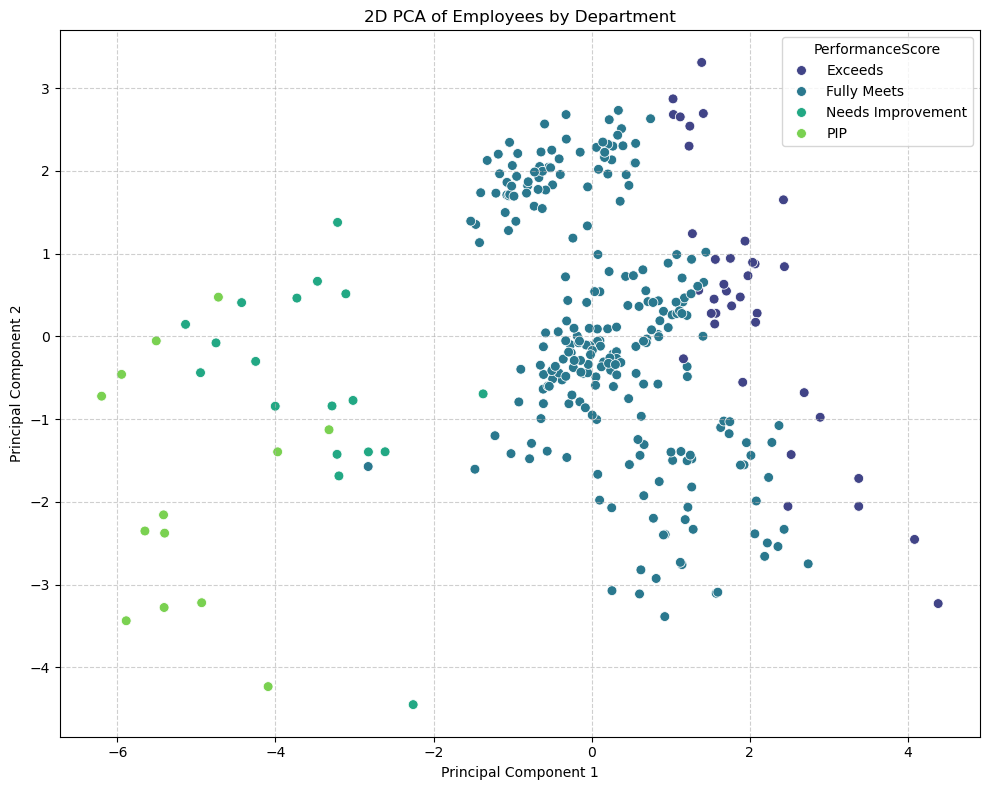

In [42]:
#Visualize employees in PCA-reduced 2D space grouped by PerformanceScore.
#Get PerformanceScore col by merging PCA df with originial one
final_df = pd.concat([pca_df, df['PerformanceScore']], axis=1)
#plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='PerformanceScore', data=final_df, s=50, palette='viridis')
plt.title('2D PCA of Employees by Department')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

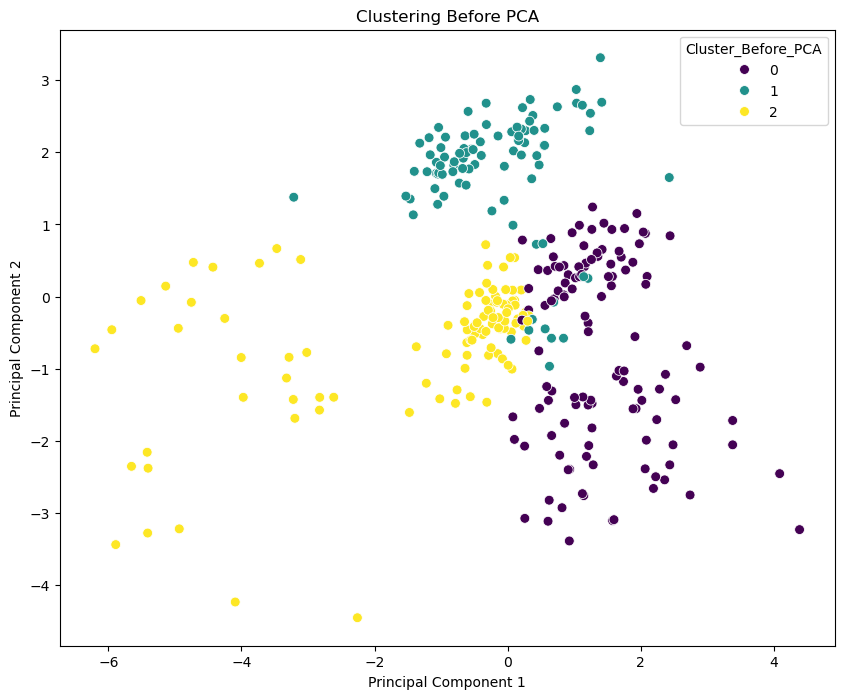

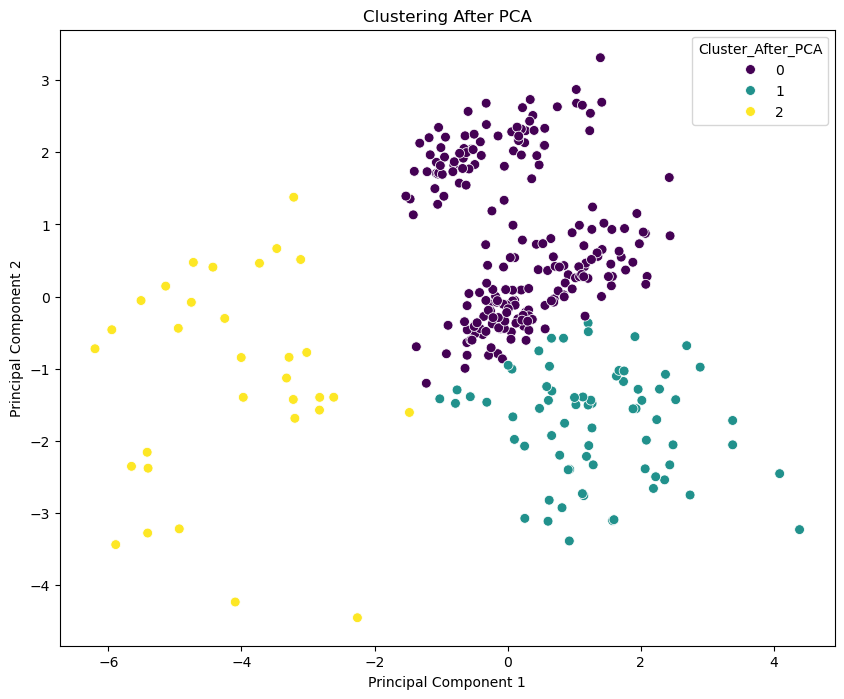

In [43]:
#Compare clustering before and after PCA using k-means on numeric data.
from sklearn.cluster import KMeans
#select numeric columns
numeric_columns = df.select_dtypes(include='number').columns
x = df[numeric_columns]
#standardize numerical features
scaler = StandardScaler()
x_scld = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

#drop column with missing values 
x_scld.drop("ManagerID", axis=1, inplace=True)

#identify no. of clusters for K means
k=3
# K-means before PCA
km_before = KMeans(n_clusters=k, random_state=42, n_init='auto')
clusters_before = km_before.fit_predict(x_scld)
x_scld['Cluster_Before_PCA'] = clusters_before 

#perfom PCA
pca = PCA(n_components=2)
p_components = pca.fit_transform(x_scld.drop('Cluster_Before_PCA', axis=1))
pca_df = pd.DataFrame(data=p_components, columns=['PC1', 'PC2'])
pca_df['Cluster_Before_PCA']= clusters_before

#K-means After PCA
km_after = KMeans(n_clusters=k, random_state=42, n_init='auto')
clusters_after = km_after.fit_predict(pca_df[['PC1', 'PC2']])
pca_df['Cluster_After_PCA']= clusters_after

#Visualizing for comparison
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster_Before_PCA', data=pca_df, s=50, palette='viridis')
plt.title("Clustering Before PCA")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#After PCA
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster_After_PCA', data=pca_df, s=50, palette='viridis')
plt.title("Clustering After PCA")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_8\2381362041.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(loadings_to_plot['PC1'][i]*1.1, loadings_to_plot['PC2'][i]*1.1, var, fontsize=12)
C:\Users\HP\AppData\Local\Temp\ipykernel_8\2381362041.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.arrow(0, 0, loadings_to_plot['PC1'][i], loadings_to_plot['PC2'][i],


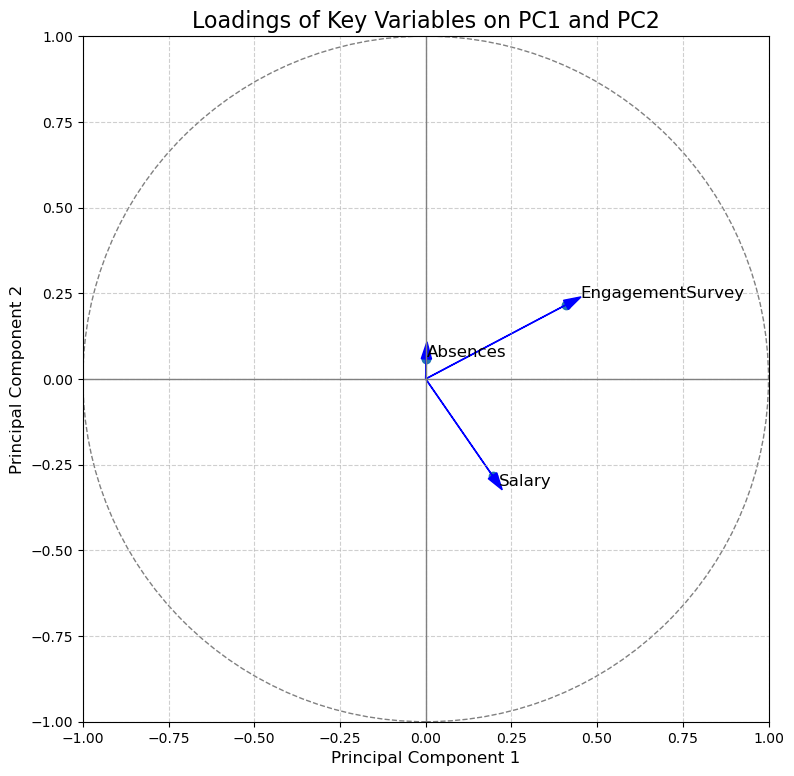

In [44]:
#Plot loadings of salary, absences, and engagement on the first 2 PCs.
# Select only the numerical columns
numeric_cols = df.select_dtypes(include='number').columns
x = df[numeric_cols]

# Standardize the numerical features.
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

#drop column with missing values for PCA
x_scaled.drop("ManagerID", axis=1, inplace=True)

#Perform Principal Component Analysis (PCA)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_scaled)# Fit PCA to the standardized data.

# DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

#Plot the Loadings 
loadings = pca.components_ #Accessing the loadings from the PCA model

#DataFrame for loadings
loadings_df = pd.DataFrame(loadings.T, columns=['PC1', 'PC2'], index=x_scaled.columns)

# Select variables for the plot
vars_to_plot = ['Salary', 'Absences', 'EngagementSurvey']
loadings_to_plot = loadings_df.loc[vars_to_plot]

# Create the plot
plt.figure(figsize=(8, 8))
plt.scatter(loadings_to_plot['PC1'], loadings_to_plot['PC2'])

# Add labels for each variable
for i, var in enumerate(loadings_to_plot.index):
    plt.text(loadings_to_plot['PC1'][i]*1.1, loadings_to_plot['PC2'][i]*1.1, var, fontsize=12)
    # Draw an arrow from the origin to the variable point
    plt.arrow(0, 0, loadings_to_plot['PC1'][i], loadings_to_plot['PC2'][i],
              head_width=0.03, head_length=0.05, fc='b', ec='b')

# Add a circle to represent the unit circle
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)

plt.title('Loadings of Key Variables on PC1 and PC2', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()